In [19]:
import os
from dotenv import load_dotenv, find_dotenv
from loguru import logger
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# find .env automagically by walking up directories until it's found
logger.info("Finding .env file")
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)
logger.success("Loaded .env file")

logger.info("Reading environment variables")
project_dir = os.environ.get("PROJECT_DIR")
logger.success(f"PROJECT_DIR: {project_dir}")

# Set up logging configuration
#logger.add("logs.log", rotation="500 MB", level="INFO")

# Log the folder path and file names
logger.info("Listing files in the raw data folder")
dataset_path = os.path.join(project_dir, 'data/raw')
file_list = os.listdir(dataset_path)

logger.success(f"Files in folder {dataset_path}:")
logger.info([file_name for file_name in file_list])

2024-06-18 20:01:34.783 | INFO     | __main__:<module>:9 - Finding .env file
2024-06-18 20:01:34.791 | SUCCESS  | __main__:<module>:14 - Loaded .env file
2024-06-18 20:01:34.794 | INFO     | __main__:<module>:16 - Reading environment variables
2024-06-18 20:01:34.797 | SUCCESS  | __main__:<module>:18 - PROJECT_DIR: /home/batek254/waste_management
2024-06-18 20:01:34.800 | INFO     | __main__:<module>:24 - Listing files in the raw data folder
2024-06-18 20:01:34.807 | SUCCESS  | __main__:<module>:28 - Files in folder /home/batek254/waste_management/data/raw:
2024-06-18 20:01:34.810 | INFO     | __main__:<module>:29 - ['trash', 'paper', '.gitkeep', 'cardboard', 'plastic', 'glass', 'metal']


In [16]:
# Retrieve the names of all folders (representing trash types) within the dataset directory
garbage_types = os.listdir(dataset_path)

# Set to store unique image dimensions for the entire dataset
all_dimensions_set = set()

# Iterate over each trash type (folder) to process images
for garbage_type in garbage_types:
    folder_path = os.path.join(dataset_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Display the count of images in the current folder
        num_images = len(image_files)
        logger.info(f"{garbage_type} folder contains {num_images} images.")
        
        # Loop over each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                # Extract the width, height, and channels (color depth) of the image and add to the dimensions set
                width, height = img.size
                channels = len(img.getbands())
                all_dimensions_set.add((width, height, channels))
                
# Determine if all images in the entore dataset have the same dimensions 
if len(all_dimensions_set) == 1: 
    width, height, channel = all_dimensions_set.pop()
    logger.success(f"\nAll images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    logger.error("\nThe images in the dataset have different dimensions or color channels.")


2024-06-18 19:49:20.272 | INFO     | __main__:<module>:19 - trash folder contains 137 images.
2024-06-18 19:49:20.569 | INFO     | __main__:<module>:19 - paper folder contains 594 images.
2024-06-18 19:49:21.654 | INFO     | __main__:<module>:19 - cardboard folder contains 403 images.
2024-06-18 19:49:22.406 | INFO     | __main__:<module>:19 - plastic folder contains 482 images.
2024-06-18 19:49:23.221 | INFO     | __main__:<module>:19 - glass folder contains 501 images.
2024-06-18 19:49:24.060 | INFO     | __main__:<module>:19 - metal folder contains 410 images.
2024-06-18 19:49:24.767 | SUCCESS  | __main__:<module>:33 - 
All images in the dataset have the same dimensions: 512x384 with 3 color channels.


In [23]:
# Remove the '.gitkeep' element from the list of garbage types
garbage_types.remove('.gitkeep')

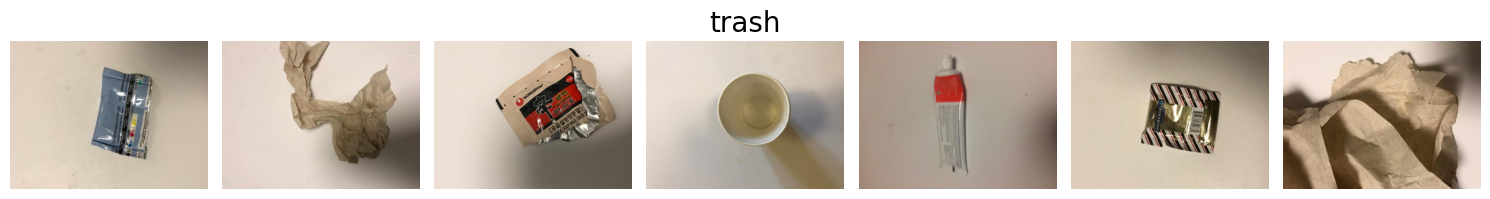

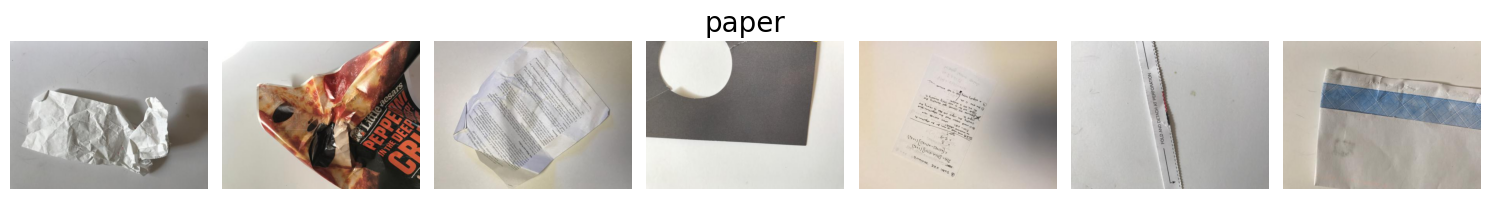

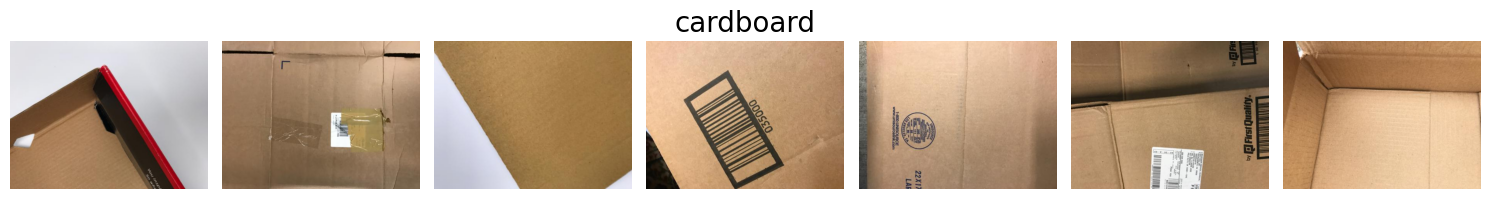

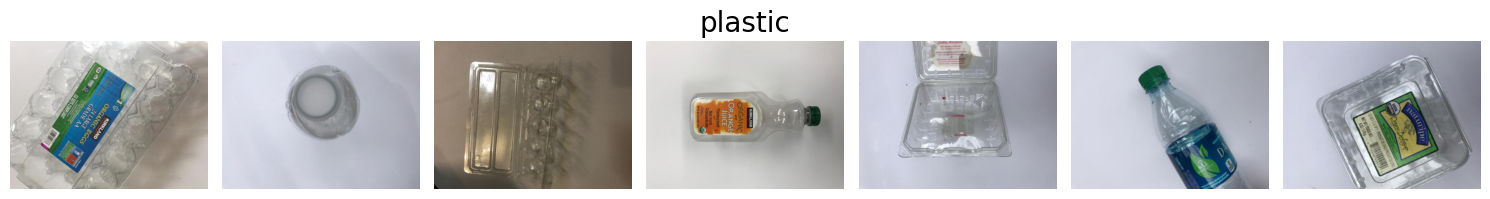

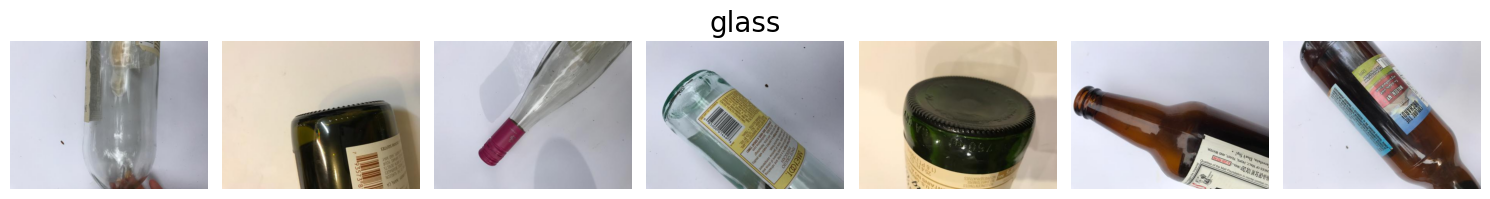

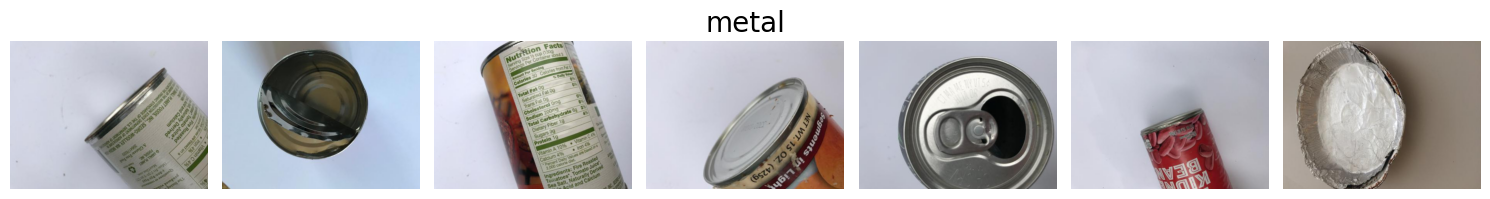

In [18]:
# Iterate over each trash type (folder) to display images
for garbage_type in garbage_types:
    folder_path = os.path.join(dataset_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Select the first 10 images
        image_files = image_files[:7]
        
        # Set up subplots
        fig, axs = plt.subplots(1, 7, figsize=(15, 2))
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                axs[i].imshow(img)
                axs[i].axis('off')
        
        plt.tight_layout()
        fig.suptitle(garbage_type, fontsize=20, y=1.03)
        plt.show()

In [24]:
# Initialize an empty list to store image file paths and their respective labels
data = []

# Loop through each garbage type and collect its images' file paths
for garbage_type in garbage_types:
    for file in os.listdir(os.path.join(dataset_path, garbage_type)):
        # Append the image file path and its trash type (as a label) to the data list
        data.append((os.path.join(dataset_path, garbage_type, file), garbage_type))

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.head()

,filepath,label
0,/home/batek254/waste_management/data/raw/trash...,trash
1,/home/batek254/waste_management/data/raw/trash...,trash
2,/home/batek254/waste_management/data/raw/trash...,trash
3,/home/batek254/waste_management/data/raw/trash...,trash
4,/home/batek254/waste_management/data/raw/trash...,trash
